## House Price Prediction using Machine Learning

### 1. Problem Statement

Predict house prices using machine learning based on property features
such as area, zoning, building type, and overall condition.

### 2. Dataset Overview

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

house_df = pd.read_csv("../data/house_prices.csv")
house_df.shape


(2919, 13)

In [2]:
house_df.head(3)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0


### 3. Data Cleaning & Preprocessing

In [3]:
# Remove duplicate rows
house_df.drop_duplicates(inplace=True)
house_df.shape

(2919, 13)

In [4]:
# Drop unnecessary ID column
house_df.drop(columns=['Id'], inplace=True)
house_df.head(3)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0


In [5]:
# Check missing values
house_df.isna().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [6]:
## Handle missing values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
house_df['SalePrice'] = imputer.fit_transform(house_df[['SalePrice']])


In [7]:
# Fill remaining missing values with 0
house_df = house_df.fillna(0)
house_df.isna().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

### 4. Exploratory Data Analysis (EDA)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

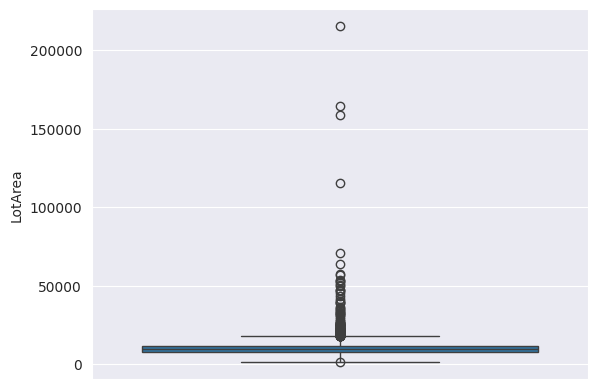

In [9]:
# Boxplot for LotArea
sns.boxplot(y=house_df['LotArea'])
plt.show()

In [10]:
import numpy as np

Q1 = np.percentile(house_df['LotArea'], 25)
Q3 = np.percentile(house_df['LotArea'], 75)
IQR = Q3 - Q1

lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

df = house_df[
    (house_df['LotArea'] > lowerBound) &
    (house_df['LotArea'] < upperBound)
]
df.shape


(2791, 12)

### 5. Feature Selection

In [11]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols


['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Ensure all categorical columns are strings
df[cat_cols] = df[cat_cols].astype(str)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore'
)

encoder.fit(df[cat_cols])

encoded_cols = encoder.get_feature_names_out(cat_cols)
df[encoded_cols] = encoder.transform(df[cat_cols])

df.drop(columns=cat_cols, inplace=True)



In [13]:

df.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_0,MSZoning_C (all),...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Define X and y

In [14]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']

### 6. Feature Scaling & Model Training (Linear Regression)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((2232, 38), (559, 38))

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### 7. Model Evaluation

In [18]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

30415.997264402784

#### Regularization Models

#### Lasso Regression

In [19]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)

lasso_pred = lasso_reg.predict(X_test)
mean_absolute_error(y_test, lasso_pred)

30416.692146151225

#### Ridge Regression

In [20]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
mean_absolute_error(y_test, ridge_pred)

30152.10830934876

### 8. Conclusion

The Linear Regression model provides a reasonable baseline for predicting
house prices. Regularization techniques like Ridge and Lasso slightly
improve performance by reducing overfitting. Feature scaling and proper
encoding play a crucial role in model accuracy.
